In [2]:
import pandas as pd
df=pd.read_csv('Historical_Product_Demand[1].csv')
import matplotlib.pyplot as plt

In [4]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


In [12]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Historical_Product_Demand[1].csv")

# Check the shape of the DataFrame
data_shape = data.shape
print("Shape of the DataFrame:", data_shape)

# Check the data types of each column
data_types = data.dtypes
print("\nData Types of each column:")
print(data_types)


Shape of the DataFrame: (1048575, 5)

Data Types of each column:
Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object


In [14]:
df.tail()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50
1048574,Product_0704,Whse_J,Category_001,2016/6/27,4


In [18]:
import pandas as pd

# Assuming the dataset has already been loaded into 'data'
columns_to_convert = ['Order_Demand']  # List of columns to convert to numeric

# Convert the specified columns to numeric with coercion for invalid values
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce').astype(pd.Int64Dtype())  # Use Int64Dtype to handle NaNs

# Print the updated data types
print(data.dtypes)


Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand         Int64
dtype: object


In [20]:
df.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,481099,2075,112682


In [22]:
null_values=data.isnull()

null_values_count=data.isnull().sum()
print("count of null values in each column:")
print(null_values_count)

any_null_values=data.isnull().any().any()
print("\nAre there any null values in the DataFrame?", any_null_values)

count of null values in each column:
Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand        10469
dtype: int64

Are there any null values in the DataFrame? True


In [24]:
data_cleaned=data.dropna()

print("shape of DataFrame after dropping null values:", data_cleaned.shape)

shape of DataFrame after dropping null values: (1031437, 5)


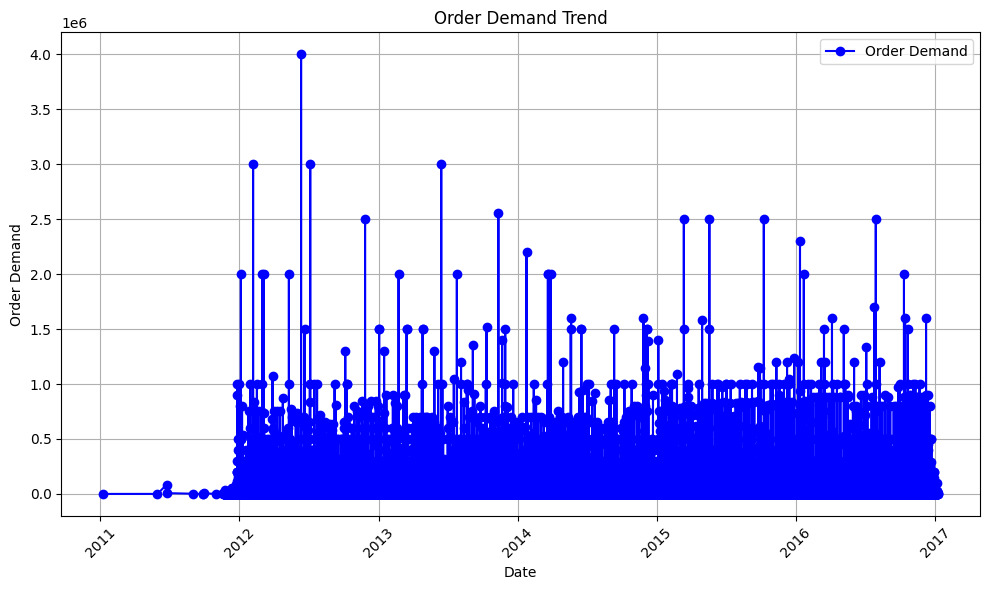

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Check for missing or non-numeric values in 'Order_Demand'
df['Order_Demand'] = pd.to_numeric(df['Order_Demand'], errors='coerce')

# Drop rows with NaN values in 'Date' or 'Order_Demand'
df.dropna(subset=['Date', 'Order_Demand'], inplace=True)

# Convert the 'Date' column to datetime format using the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

# Sort the DataFrame by the 'Date' column
df.sort_values(by='Date', inplace=True)

# Plot the 'Order_Demand' against 'Date'
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(df['Date'], df['Order_Demand'], marker='o', linestyle='-', color='b', label='Order Demand')

# Adding labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.title('Order Demand Trend')
plt.xticks(rotation=45)

# Optional: Add gridlines and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


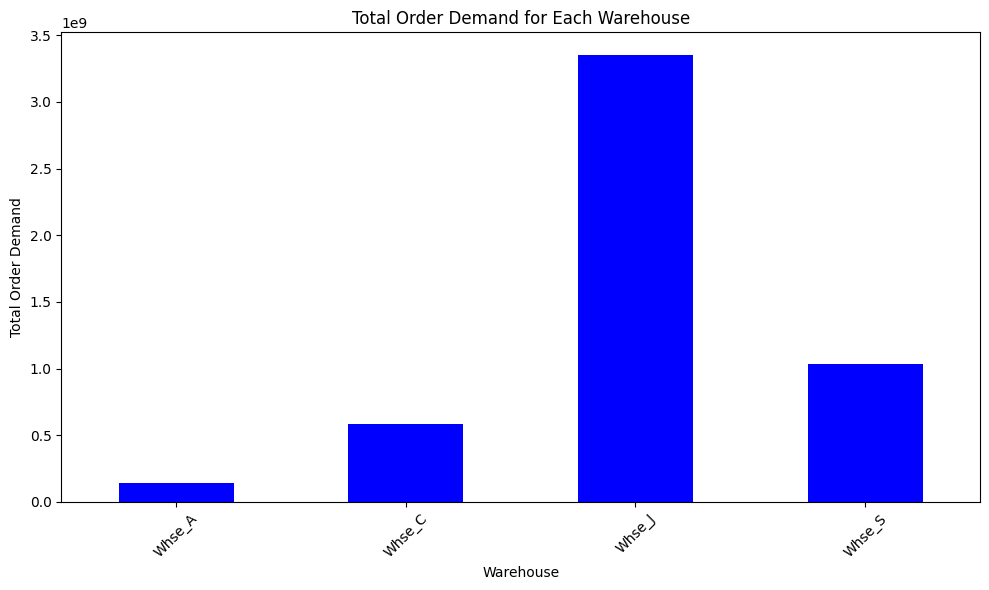

In [78]:
import matplotlib.pyplot as plt

# Group the data by 'Warehouse' and sum the 'Order_Demand' for each warehouse
warehouse_demand = df.groupby('Warehouse')['Order_Demand'].sum()

# Plot the total order demand for each warehouse as a bar chart
plt.figure(figsize=(10, 6))  # Optional: set figure size
warehouse_demand.plot(kind='bar', color='blue')

# Add labels and title to the plot
plt.xlabel('Warehouse')
plt.ylabel('Total Order Demand')
plt.title('Total Order Demand for Each Warehouse')

# Optional: Rotate x-axis labels if there are many categories
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


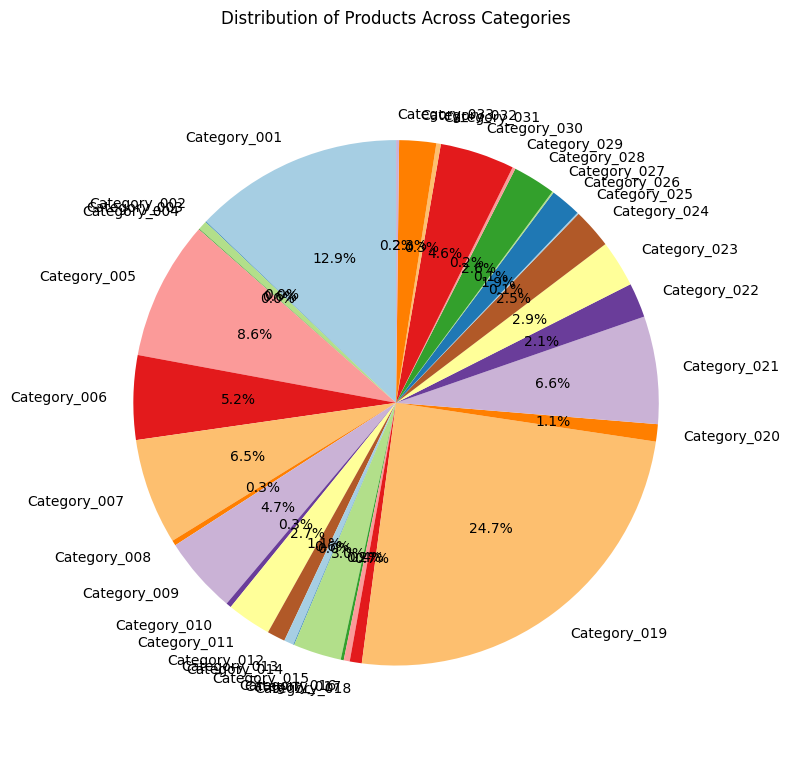

In [92]:
import matplotlib.pyplot as plt

# Group the data by 'Product_category' and count the number of unique 'Product_code' in each category
product_category_counts = df.groupby('Product_Category')['Product_Code'].nunique()

# Plot the distribution of products across categories as a pie chart
plt.figure(figsize=(8, 8))  # Optional: Set figure size for better display
product_category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Remove the y-axis label and set the title
plt.ylabel('')
plt.title('Distribution of Products Across Categories')

# Make the pie chart circular
plt.axis('equal')

# Display the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


In [94]:
import pandas as pd
import pulp

# Group by 'Product_Code' and sum the 'Order_Demand' to get the total demand for each product
product_demand = df.groupby('Product_Code')['Order_Demand'].sum()

# Create a Linear Programming problem
lp_problem = pulp.LpProblem("Linear_Programming_Problem", pulp.LpMinimize)

# Define decision variables: order quantity for each product
order_qty = pulp.LpVariable.dicts('order_qty', product_demand.index, lowBound=0, cat='Integer')

# Define the holding cost (you can adjust the value based on actual costs)
holding_cost = 2  # Assuming a holding cost of 2 units per product

# Objective function: Minimize the total inventory holding cost
lp_problem += pulp.lpSum(holding_cost * order_qty[p] for p in product_demand.index), "Objective"

# Constraints: Order quantity for each product should be greater than or equal to the demand
for p in product_demand.index:
    lp_problem += order_qty[p] >= product_demand[p], f"Order_Quantity_for_{p}"

# Solve the problem
lp_problem.solve()

# Print the status of the solution
print("Status:", pulp.LpStatus[lp_problem.status])

# Print the optimal order quantities for each product
for p in product_demand.index:
    print(f"Optimal order quantity for {p}: {pulp.value(order_qty[p])}")

# Calculate and print the total inventory holding cost (objective value)
total_holding_cost = pulp.value(lp_problem.objective)
print("Total Inventory Holding Cost:", total_holding_cost)


Status: Optimal
Optimal order quantity for Product_0001: 456200.0
Optimal order quantity for Product_0002: 8796000.0
Optimal order quantity for Product_0003: 118000.0
Optimal order quantity for Product_0004: 124300.0
Optimal order quantity for Product_0005: 22300.0
Optimal order quantity for Product_0006: 7600.0
Optimal order quantity for Product_0007: 201200.0
Optimal order quantity for Product_0008: 505500.0
Optimal order quantity for Product_0009: 46900.0
Optimal order quantity for Product_0010: 85300.0
Optimal order quantity for Product_0011: 1410600.0
Optimal order quantity for Product_0012: 4764000.0
Optimal order quantity for Product_0013: 501700.0
Optimal order quantity for Product_0014: 483000.0
Optimal order quantity for Product_0015: 211000.0
Optimal order quantity for Product_0016: 3982600.0
Optimal order quantity for Product_0017: 587700.0
Optimal order quantity for Product_0018: 3040800.0
Optimal order quantity for Product_0019: 556100.0
Optimal order quantity for Product

In [96]:
import pandas as pd
from scipy.stats import norm

# Load the dataset
data = pd.read_csv('Historical_Product_Demand[1].csv')

# Convert 'Order_Demand' to numeric (in case of any issues with the format)
data['Order_Demand'] = pd.to_numeric(data['Order_Demand'], errors='coerce')

# Calculate the average demand rate and standard deviation
average_demand = data['Order_Demand'].mean()
demand_std_dev = data['Order_Demand'].std()

# Lead Time (Assume a constant lead time for simplicity)
lead_time = 5  # You can adjust the lead time as needed

# Desired Service Level (probability of not running out of stock during lead time)
service_level = 0.95  # 95% service level

# Calculate the Z-score corresponding to the service level
z_score = norm.ppf(service_level)

# Calculate the safety stock
safety_stock = z_score * demand_std_dev * (lead_time ** 0.5)

# Calculate the Reorder Point (ROP)
ROP = average_demand * lead_time + safety_stock

# Output the results
print(f"Average Demand: {average_demand:.2f}")
print(f"Demand Standard Deviation: {demand_std_dev:.2f}")
print(f"Safety Stock: {safety_stock:.2f}")
print(f"Reorder Point (ROP): {ROP:.2f}")


Average Demand: 4936.49
Demand Standard Deviation: 29024.62
Safety Stock: 106752.70
Reorder Point (ROP): 131435.14


In [104]:
ordering_cost=50

holding_cost=2

EOQ=((2 * average_demand * ordering_cost)/holding_cost)**0.5
print("Economic Order Quantity(EOQ):",EOQ)


Economic Order Quantity(EOQ): 496.8142514527764


In [106]:
import numpy as np
from scipy.stats import norm

# Assumed values
selling_price = 150
unit_cost = 100
ordering_cost = 50  # Assume an arbitrary ordering cost
service_level = 0.95  # 95% service level

# Given Parameters for Sensitivity Analysis
demand_values = np.arange(100, 1000, 100)  # Varying demand from 100 to 900 units
lead_time_values = np.arange(3, 12, 1)     # Varying lead time from 3 to 11 days
holding_cost_values = np.arange(1, 5, 1)   # Varying holding cost from 1 to 4

# Initialize results dictionary
results = {}

# Perform sensitivity analysis for EOQ, ROP, and Profit
for demand in demand_values:
    for lead_time in lead_time_values:
        for holding_cost in holding_cost_values:
            
            # Calculate EOQ
            EOQ = np.sqrt((2 * demand * ordering_cost) / holding_cost)

            # Calculate ROP (Reorder Point)
            demand_std_dev = np.sqrt(demand)  # Assumed standard deviation proportional to sqrt of demand
            z_score = norm.ppf(service_level)  # Z-score for desired service level
            safety_stock = z_score * demand_std_dev * np.sqrt(lead_time)
            ROP = demand * lead_time + safety_stock

            # Calculate total cost (ordering cost + holding cost)
            total_ordering_cost = (ordering_cost * demand) / EOQ
            total_holding_cost = (holding_cost * EOQ) / 2
            total_cost = total_ordering_cost + total_holding_cost

            # Calculate total revenue and profit
            total_sales = demand  # Assuming demand is fully met
            total_revenue = selling_price * total_sales
            total_profit = total_revenue - total_cost - (unit_cost * total_sales)

            # Store results in the dictionary
            results[(demand, lead_time, holding_cost)] = (EOQ, ROP, total_cost, total_revenue, total_profit)

# Find the optimal solution (maximum profit)
optimal_solution = max(results, key=lambda k: results[k][4])
optimal_EOQ, optimal_ROP, optimal_total_cost, optimal_total_revenue, optimal_profit = results[optimal_solution]

# Print the optimal values
print(f"Optimal EOQ: {optimal_EOQ:.2f}")
print(f"Optimal ROP: {optimal_ROP:.2f}")
print(f"Optimal Total Cost: {optimal_total_cost:.2f}")
print(f"Optimal Total Revenue: {optimal_total_revenue:.2f}")
print(f"Optimal Profit: {optimal_profit:.2f}")


Optimal EOQ: 300.00
Optimal ROP: 2785.47
Optimal Total Cost: 300.00
Optimal Total Revenue: 135000.00
Optimal Profit: 44700.00
